In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

In [3]:
# Step 1: Load the data
filepath = "C:/Users/shara/Desktop/CLASSES/Project 4 due June10,25/Resources/road_accdients_data.csv"
df = pd.read_csv(filepath)
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01/01/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,05/01/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,04/01/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,05/01/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,06/01/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling missing values
df.fillna("Unknown", inplace=True)

# Encoding categorical variables
categorical_cols = ['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area', 'Vehicle_Type']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df['Speed_limit'] = scaler.fit_transform(df[['Speed_limit']])

print("Preprocessing completed successfully!")

Preprocessing completed successfully!


In [11]:
# Convert time from 'HH:MM' format to an integer representing the hour
df['Time'] = df['Time'].apply(lambda x: int(x.split(':')[0]))

print(df[['Time']].head())  # Check if conversion worked

   Time
0    15
1    10
2    14
3     8
4    17


In [146]:
print(df.columns)

Index(['Accident_Index', 'Accident Date', 'Month', 'Day_of_Week', 'Year',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Define features & target variable
X = df[['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Time', 'Speed_limit', 'Urban_or_Rural_Area', 'Vehicle_Type']]
y = df['Accident_Severity']

# Convert accident severity into two classes
y = y.replace({'Slight': 0, 'Serious': 1, 'Fatal': 1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Train Random Forest Classifier**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

### **Train Gradient Boosting Classifier**
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))

### **Confusion Matrix Visualization**
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Slight", "Severe"], yticklabels=["Slight", "Severe"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()



C:\Users\shara\AppData\Local\Temp\ipykernel_21812\1128486471.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Slight': 0, 'Serious': 1, 'Fatal': 1})


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     17053
           1       0.25      0.02      0.04      2947

    accuracy                           0.85     20000
   macro avg       0.55      0.51      0.48     20000
weighted avg       0.77      0.85      0.79     20000

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     17053
           1       0.00      0.00      0.00      2947

    accuracy                           0.85     20000
   macro avg       0.43      0.50      0.46     20000
weighted avg       0.73      0.85      0.78     20000



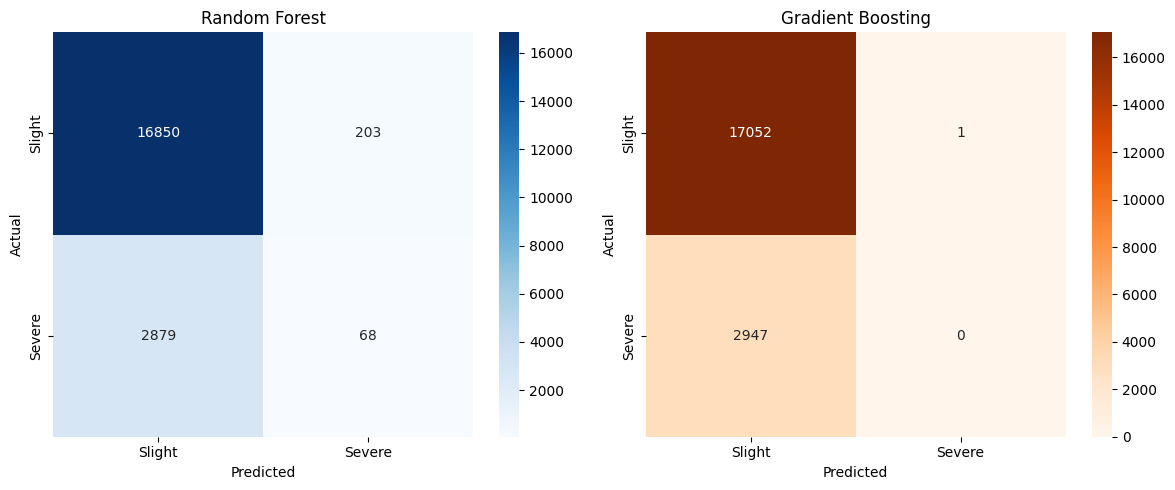

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Set up figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Random Forest Confusion Matrix (Blue)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Slight", "Severe"], yticklabels=["Slight", "Severe"], ax=axes[0])
axes[0].set_title("Random Forest")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Plot Gradient Boosting Confusion Matrix (Orange)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Oranges", xticklabels=["Slight", "Severe"], yticklabels=["Slight", "Severe"], ax=axes[1])
axes[1].set_title("Gradient Boosting")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Show plots
plt.tight_layout()
plt.show()

In [67]:
# Improving model
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features & target variable
X = df[['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Time', 'Speed_limit', 'Urban_or_Rural_Area', 'Vehicle_Type']]
y = df['Accident_Severity']

# Convert accident severity into two classes
y = y.replace({'Slight': 0, 'Serious': 1, 'Fatal': 1})

# Split dataset (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())  # Shows original class distribution
print("After SMOTE:\n", y_train_resampled.value_counts())  # Shows balanced class distribution

Before SMOTE:
 Accident_Severity
0    68319
1    11680
Name: count, dtype: int64
After SMOTE:
 Accident_Severity
1    68319
0    68319
Name: count, dtype: int64


C:\Users\shara\AppData\Local\Temp\ipykernel_21812\113590786.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Slight': 0, 'Serious': 1, 'Fatal': 1})


In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

print("Random Forest Performance (After SMOTE):")
print(classification_report(y_test, y_pred_rf, target_names=["Slight (0)", "Severe (1)"]))

print("Gradient Boosting Performance (After SMOTE):")
print(classification_report(y_test, y_pred_gb, target_names=["Slight (0)", "Severe (1)"]))

Random Forest Performance (After SMOTE):
              precision    recall  f1-score   support

  Slight (0)       0.87      0.72      0.79     17080
  Severe (1)       0.18      0.36      0.24      2920

    accuracy                           0.67     20000
   macro avg       0.52      0.54      0.51     20000
weighted avg       0.77      0.67      0.71     20000

Gradient Boosting Performance (After SMOTE):
              precision    recall  f1-score   support

  Slight (0)       0.88      0.74      0.80     17080
  Severe (1)       0.20      0.39      0.27      2920

    accuracy                           0.69     20000
   macro avg       0.54      0.56      0.53     20000
weighted avg       0.78      0.69      0.72     20000



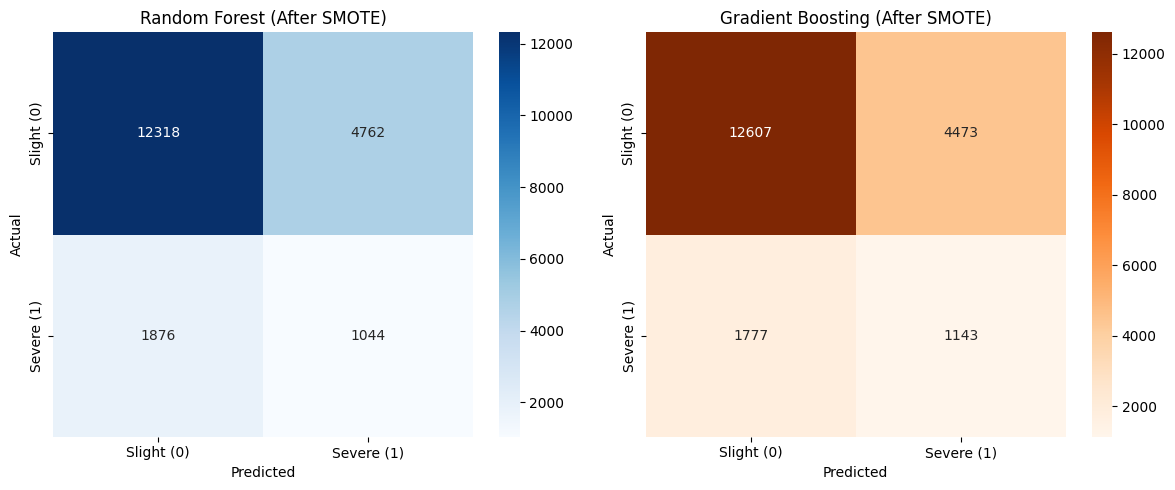

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Set up figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Slight (0)", "Severe (1)"], yticklabels=["Slight (0)", "Severe (1)"], ax=axes[0])
axes[0].set_title("Random Forest (After SMOTE)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Oranges", xticklabels=["Slight (0)", "Severe (1)"], yticklabels=["Slight (0)", "Severe (1)"], ax=axes[1])
axes[1].set_title("Gradient Boosting (After SMOTE)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [410]:
import xgboost as xgb

# Train XGBoost with optimized hyperparameters
xgb_model = xgb.XGBClassifier(
    n_estimators=150,  # More trees for better learning
    learning_rate=0.08,  # Slightly lower to prevent overfitting
    max_depth=5,  # Balanced depth to capture complexity
    scale_pos_weight=1.05,  # Reduce Severe bias to avoid false positives
    subsample=0.8,  # Prevent overfitting
    colsample_bytree=0.8,  # Improve feature diversity
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [411]:
import numpy as np

# Predict probabilities
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Adjust classification threshold
threshold = 0.50 # Try different values (e.g., 0.6 → 0.7)
y_pred_xgb_adjusted = np.where(y_prob_xgb > threshold, 1, 0)

In [414]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to dominant features
scaler = StandardScaler()
X_train_resampled[['Speed_limit', 'Urban_or_Rural_Area']] = scaler.fit_transform(X_train_resampled[['Speed_limit', 'Urban_or_Rural_Area']])
X_test[['Speed_limit', 'Urban_or_Rural_Area']] = scaler.transform(X_test[['Speed_limit', 'Urban_or_Rural_Area']])

XGBoost Performance (Threshold = 0.5):
              precision    recall  f1-score   support

  Slight (0)       0.87      0.69      0.77     17080
  Severe (1)       0.19      0.42      0.26      2920

    accuracy                           0.65     20000
   macro avg       0.53      0.55      0.51     20000
weighted avg       0.77      0.65      0.70     20000



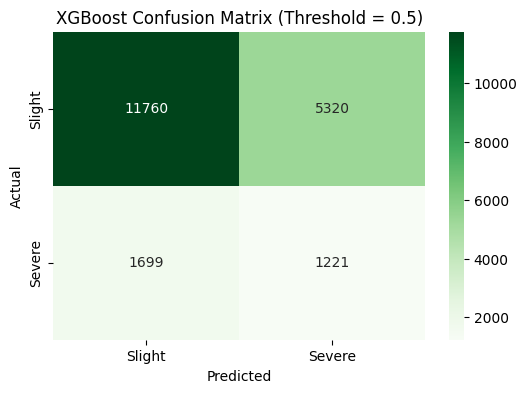

In [416]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(f"XGBoost Performance (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_xgb_adjusted, target_names=["Slight (0)", "Severe (1)"]))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", xticklabels=["Slight", "Severe"], yticklabels=["Slight", "Severe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"XGBoost Confusion Matrix (Threshold = {threshold})")
plt.show()